In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

%matplotlib inline

In [2]:
data = pd.read_csv('data_spotify_v2.csv', index_col= 0)

In [5]:
data.shape

(1669, 42)

In [6]:
data.dropna(how='any', inplace= True)

In [7]:
data.drop(['is_collaborative', 'is_public'], axis =1 , inplace= True)

In [9]:
data1 = data.copy()
X = data1.drop(['followers'], axis = 1)

In [10]:
scaler = MinMaxScaler().fit(X)

data1 = scaler.transform(X)

data1 = pd.DataFrame(data1, columns= X.columns)

data1['followers'] = data['followers']



In [54]:
data3 = data1.copy()

In [55]:

data3['followers'] = np.log10(1 + data3['followers'])

In [57]:
y = (data1['followers'])

X = data1.drop(['followers'], axis = 1)

In [58]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              followers   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     8.876
Date:                Sun, 03 Dec 2017   Prob (F-statistic):           2.52e-45
Time:                        23:55:15   Log-Likelihood:                -24607.
No. Observations:                1669   AIC:                         4.929e+04
Df Residuals:                    1629   BIC:                         4.951e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -9.063e+05   5.17e+05     -1.755      0.080   -1.92e+06    1.07e+05
acousticness_avg        1.34e+05   1.94e+05      0.691      0.490   -2.46e+05    5.14e+05
acousticness_std       1.066e+04   1.45e+05      0.074      0.941   -2.74e+05    2.95e+05
artist_genres         -7.221e+04   1.68e+05     -0.429      0.668   -4.02e+05    2.58e+05
artist_popularity_avg -1.111e+05   2.08e+05     -0.534      0.593   -5.19e+05    2.97e+05
artist_popularity_std  2.552e+04   1.55e+05      0.165      0.869   -2.78e+05    3.29e+05
danceability_avg       4.628e+05   2.52e+05      1.840      0.066   -3.06e+04    9.56e+05
danceability_std       3.333e+04   2.31e+05      0.144      0.885   -4.19e+05    4.86e+05
duration_ms_avg       -3.195e+06    6.6e+06     -0.484      0.628   -1.61e+07    9.75e+06
duration_ms_std        1.018e+06   1.41e+06      0.722      0.471   -1.75e+06    3.78e+06
energy_avg             9.931e+04    3.5e+05      0.284      0.777   -5.87e+05    7.86e+05
energy_std             1.228e+04   2.27e+05      0.054      0.957   -4.32e+05    4.57e+05
first_update          -1.152e+05      2e+05     -0.575      0.565   -5.08e+05    2.78e+05
instrumentalness_avg   5.671e+04   1.19e+05      0.475      0.635   -1.77e+05    2.91e+05
instrumentalness_std  -1.692e+04   9.39e+04     -0.180      0.857   -2.01e+05    1.67e+05
key_avg                 2.17e+04   1.68e+05      0.129      0.897   -3.07e+05    3.51e+05
key_std                 9.61e+04   1.83e+05      0.524      0.601   -2.64e+05    4.56e+05
last_update            3.044e+05    2.1e+05      1.453      0.146   -1.07e+05    7.15e+05
liveness_avg          -2.948e+05   2.92e+05     -1.010      0.313   -8.67e+05    2.78e+05
liveness_std           8.514e+04   1.54e+05      0.554      0.580   -2.16e+05    3.87e+05
loudness_avg           1.331e+05    5.8e+05      0.229      0.819      -1e+06    1.27e+06
loudness_std          -1.934e+04   2.85e+05     -0.068      0.946   -5.79e+05     5.4e+05
mode_avg               1.651e+05   1.62e+05      1.018      0.309   -1.53e+05    4.83e+05
mode_std               1.111e+05   1.85e+05      0.602      0.547   -2.51e+05    4.73e+05
num_of_artists         9.363e+05   3.25e+05      2.882      0.004    2.99e+05    1.57e+06
num_of_markets_avg    -3.407e+05   9.91e+04     -3.440      0.001   -5.35e+05   -1.46e+05
num_of_songs            2.75e+05   2.44e+05      1.126      0.260   -2.04e+05    7.54e+05
playlist_name_length  -2.723e+05   1.69e+05     -1.613      0.107   -6.03e+05    5.89e+04
song_duration_avg      2.755e+06   6.85e+06      0.402      0.688   -1.07e+07    1.62e+07
song_duration_std     -1.643e+06   4.18e+06     -0.393      0.694   -9.84e+06    6.55e+06
song_popularity_avg    1.319e+06   1.68e+05      7.836      0.000    9.89e+05    1.65e+06
song_popularity_std   -

*** The R-square value is very low. So next we try with the log of the number of followers ***

In [59]:
y2 = (data3['followers'])

X2 = data3.drop(['followers'], axis = 1)

In [60]:
X2.shape, y2.shape

((1669, 39), (1669,))

In [61]:
X2 = sm.add_constant(X2)
model = sm.OLS(y2,X2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              followers   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     64.15
Date:                Sun, 03 Dec 2017   Prob (F-statistic):          2.19e-296
Time:                        23:55:18   Log-Likelihood:                -2204.3
No. Observations:                1669   AIC:                             4489.
Df Residuals:                    1629   BIC:                             4705.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.8181      0.765     -1.070      0.285      -2.318       0.682
acousticness_avg         -0.2280      0.287     -0.794      0.427      -0.791       0.335
acousticness_std          0.0998      0.215      0.465      0.642      -0.321       0.521
artist_genres            -0.0816      0.249     -0.328      0.743      -0.570       0.407
artist_popularity_avg    -0.0145      0.308     -0.047      0.962      -0.618       0.589
artist_popularity_std    -0.8244      0.229     -3.598      0.000      -1.274      -0.375
danceability_avg         -0.2004      0.372     -0.538      0.591      -0.931       0.530
danceability_std          0.8524      0.342      2.495      0.013       0.182       1.523
duration_ms_avg         -17.3303      9.774     -1.773      0.076     -36.502       1.842
duration_ms_std           3.6632      2.089      1.754      0.080      -0.434       7.760
energy_avg               -0.4570      0.518     -0.882      0.378      -1.474       0.560
energy_std               -0.8945      0.335     -2.666      0.008      -1.553      -0.236
first_update             -0.5201      0.297     -1.753      0.080      -1.102       0.062
instrumentalness_avg     -0.0427      0.177     -0.241      0.809      -0.389       0.304
instrumentalness_std      0.1709      0.139      1.229      0.219      -0.102       0.444
key_avg                   0.4959      0.248      1.996      0.046       0.009       0.983
key_std                  -0.0764      0.272     -0.281      0.779      -0.609       0.457
last_update               3.7703      0.310     12.153      0.000       3.162       4.379
liveness_avg              0.4379      0.432      1.013      0.311      -0.410       1.286
liveness_std             -0.4434      0.228     -1.948      0.052      -0.890       0.003
loudness_avg              0.2828      0.859      0.329      0.742      -1.402       1.967
loudness_std              0.7059      0.422      1.672      0.095      -0.122       1.534
mode_avg                  0.5481      0.240      2.282      0.023       0.077       1.019
mode_std                  0.5063      0.273      1.852      0.064      -0.030       1.042
num_of_artists            1.8421      0.481      3.830      0.000       0.899       2.785
num_of_markets_avg       -0.5208      0.147     -3.551      0.000      -0.809      -0.233
num_of_songs              1.9212      0.362      5.312      0.000       1.212       2.631
playlist_name_length     -0.2951      0.250     -1.180      0.238      -0.785       0.195
song_duration_avg        20.1445     10.148      1.985      0.047       0.240      40.049
song_duration_std       -13.8858      6.188     -2.244      0.025     -26.023      -1.749
song_popularity_avg       1.9175      0.249      7.694      0.000       1.429       2.406
song_popularity_std    

*** Model selection ***

In [66]:
relevant = results.pvalues[results.pvalues < 0.05]

relevant

artist_popularity_std    3.307456e-04
danceability_std         1.270408e-02
energy_std               7.747222e-03
key_avg                  4.611805e-02
last_update              1.356519e-32
mode_avg                 2.261584e-02
num_of_artists           1.329988e-04
num_of_markets_avg       3.950970e-04
num_of_songs             1.232451e-07
song_duration_avg        4.730706e-02
song_duration_std        2.496580e-02
song_popularity_avg      2.448120e-14
song_popularity_std      2.369754e-06
speechiness_avg          1.095569e-03
valence_avg              1.907746e-02
dtype: float64

In [67]:
len(relevant)

15

# The variables seen here with P< 0.5 are the relevant variables. Even though the R square value is still in the range of 0.21 it is much better than the case where a log value of the number of followers was not considered

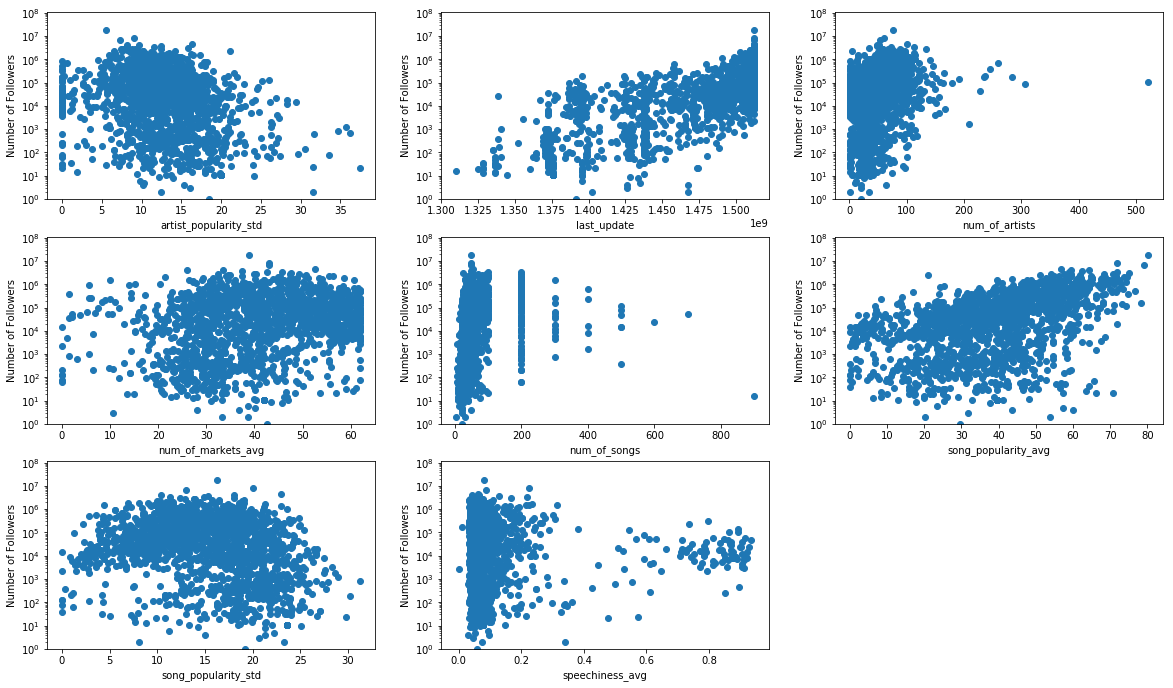

In [65]:
plt.figure(figsize=(20,20))

i=1

for r in relevant.index:
    
    plt.subplot(5,3,i)
    plt.scatter(data[r], data['followers'])
    plt.yscale('log')
    plt.ylim(ymin=1)
    plt.xlabel(r)
    plt.ylabel('Number of Followers')
        
    i += 1
    
    
    
    

# Baseline model

In [75]:
X3 = data3[relevant.index]
y3 = data3['followers']

In [89]:
 X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.33, random_state=42)

In [90]:
alpha = [10**i for i in range(-5,5)]

In [91]:
ridge = RidgeCV(alphas=alpha, cv=5).fit(X_train,y_train)
lasso = LassoCV(alphas=alpha, cv=5).fit(X_train,y_train)

In [92]:
ridge.alpha_, lasso.alpha_

(1e-05, 1.0000000000000001e-05)

In [93]:
ridge.score(X_train,y_train)

0.59010162480135064

In [94]:
ridge.score(X_test,y_test)

0.60503546463629698

# Our baseline for test R-squared is 0.605. We need more complex models to try and improve this